In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.metrics import mean_absolute_percentage_error

In [3]:
df = pd.read_csv('Data/series_data.csv')

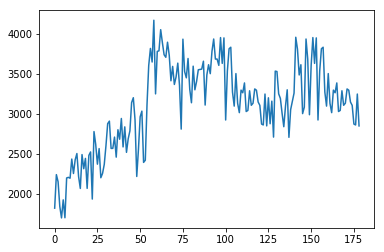

In [4]:
plt.plot(df['ACTUAL1'])

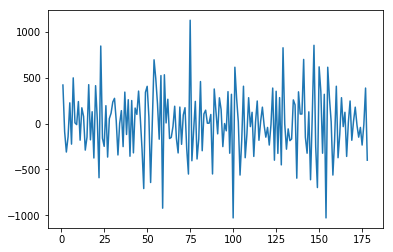

In [240]:
plt.plot(df['ACTUAL1'].diff().dropna()) #using first difference to remove trend

In [241]:
from statsmodels.tsa.stattools import adfuller 
adfuller(df['ACTUAL']) # data is not stationary

(-1.371708407049551,
 0.5957618236176134,
 12,
 166,
 {'1%': -3.4703698981001665,
  '5%': -2.8791138497902193,
  '10%': -2.576139407751488},
 1560.1956821812457)

In [115]:
adfuller(df['ACTUAL1'].diff().dropna()) #data is stationary after first difference

(-9.196564559631168,
 2.055136272587624e-15,
 4,
 173,
 {'1%': -3.4687256239864017,
  '5%': -2.8783961376954363,
  '10%': -2.57575634100705},
 2334.593887891363)

In [5]:
df.index = df['Date'] #setting date as index

In [6]:
df.index = pd.to_datetime(df.index)

## Auto Arima

In [217]:
m1 = auto_arima(df['ACTUAL1'][:140])

In [218]:
m1 # best fit arima model is (0,1,1)

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [229]:
df

,ACTUAL,ACTUAL1
Date,,
2016-12-24,112,1819
2016-12-31,118,2239
2017-01-07,132,2150
2017-01-14,129,1840
2017-01-21,121,1697
...,...,...
2020-04-25,360,3106
2020-05-02,342,2872
2020-05-09,406,2861


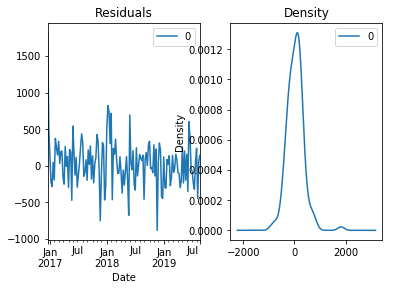

In [11]:
residuals = pd.DataFrame(m12.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()


In [12]:
residuals

,0
Date,
2016-12-24,1819.000000
2016-12-31,507.327703
2017-01-07,146.393117
2017-01-14,-225.830143
2017-01-21,-281.691870
...,...
2019-07-27,53.367322
2019-08-03,238.127557
2019-08-10,-442.721200


In [8]:
m11 = ARIMA(df['ACTUAL1'][0:140],order = (0,1,1)) # creating the best fit model

C:\Users\dreddy86\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
C:\Users\dreddy86\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
C:\Users\dreddy86\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)


In [9]:
m12 = m11.fit()
m12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                ACTUAL1   No. Observations:                  140
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -985.807
Date:                Sat, 31 Dec 2022   AIC                           1975.614
Time:                        18:34:54   BIC                           1981.483
Sample:                    12-24-2016   HQIC                          1977.999
                         - 08-24-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6395      0.049    -13.159      0.000      -0.735      -0.544
sigma2      8.395e+04   9035.198      9.292      0.000    6.62e+04    1.02e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):                 1.68
Prob(Q):                              0.66   Prob(JB):                         0.43
Heteroskedasticity (H):               1.19   Skew:                            -0.08
Prob(H) (two-sided):                  0.56   Kurtosis:                         3.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

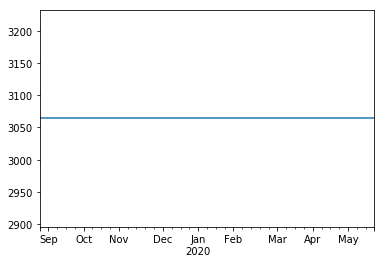

In [10]:
(m12.forecast(39)).plot() # plotting the forecast for test data

In [172]:
mean_absolute_percentage_error(m1.forecast(39),df['ACTUAL1'][140:]) #MAPE score

0.10744815378039003

## ARIMA

<Figure size 1152x360 with 0 Axes>

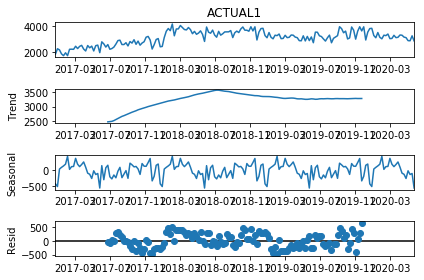

In [126]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(16,5))
seasonal_decompose(df['ACTUAL1']).plot(); # decomposing the data to look for trends or seasonality

C:\Users\dreddy86\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


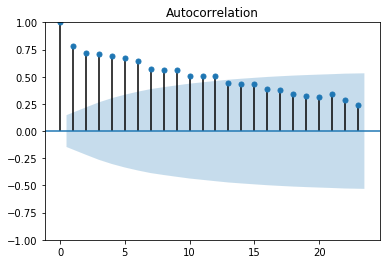

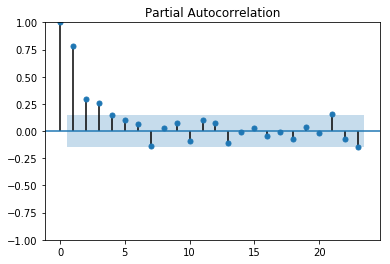

In [128]:
plot_acf(df['ACTUAL1']);
plot_pacf(df['ACTUAL1']);
# Since acf is geometrically decreasing, the model is AR. Order 3 of AR is observed from pacf plot

In [165]:
m2 = ARIMA(df['ACTUAL1'][0:140],order = (3,1,0)) # fitting AR3 model
m2 = m2.fit()
m2.summary()

C:\Users\dreddy86\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
C:\Users\dreddy86\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
C:\Users\dreddy86\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                ACTUAL1   No. Observations:                  140
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -986.660
Date:                Thu, 29 Dec 2022   AIC                           1981.320
Time:                        13:03:17   BIC                           1993.058
Sample:                    12-24-2016   HQIC                          1986.090
                         - 08-24-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5536      0.070     -7.888      0.000      -0.691      -0.416
ar.L2         -0.3710      0.084     -4.398      0.000      -0.536      -0.206
ar.L3         -0.2168      0.079     -2.731      0.006      -0.372      -0.061
sigma2      8.555e+04   9870.853      8.667      0.000    6.62e+04    1.05e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 1.41
Prob(Q):                              0.69   Prob(JB):                         0.50
Heteroskedasticity (H):               1.11   Skew:                            -0.11
Prob(H) (two-sided):                  0.73   Kurtosis:                         3.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

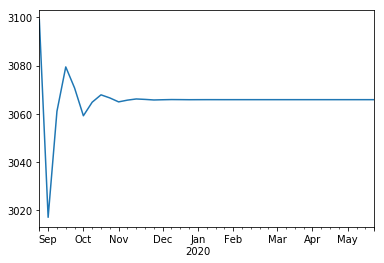

In [166]:
m2.forecast(39).plot()

In [167]:
mean_absolute_percentage_error(m2.forecast(39),df['ACTUAL1'][140:])

0.10704825969553124

In [132]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

## Exponential smoothing

In [136]:
#Trying different variations of trend and seasonality to get the best fit model
c = ExponentialSmoothing(df['ACTUAL1'][:140]).fit()
c_addTrend1 = ExponentialSmoothing(df['ACTUAL1'][:140],trend='add',seasonal='add').fit()
c_addTrend2 = ExponentialSmoothing(df['ACTUAL1'][:140],trend='add',seasonal='mul').fit()
c_mulTrend1 = ExponentialSmoothing(df['ACTUAL1'][:140],trend = 'mul',seasonal='add').fit()
c_mulTrend2 = ExponentialSmoothing(df['ACTUAL1'][:140],trend='mul',seasonal='mul').fit()
print(mean_absolute_percentage_error(c.forecast(39),df['ACTUAL1'][140:]))
print(mean_absolute_percentage_error(c_addTrend1.forecast(39),df['ACTUAL1'][140:]))
print(mean_absolute_percentage_error(c_mulTrend1.forecast(39),df['ACTUAL1'][140:]))
print(mean_absolute_percentage_error(c_addTrend2.forecast(39),df['ACTUAL1'][140:]))
print(mean_absolute_percentage_error(c_mulTrend2.forecast(39),df['ACTUAL1'][140:]))
#It is observed that no trend and no seasonality gives the model with best results

C:\Users\dreddy86\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
C:\Users\dreddy86\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
C:\Users\dreddy86\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
C:\Users\dreddy86\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)


0.1074834807599576
0.1682034918107941
0.17577647829650736
0.14869433619194772
0.15232832367754476


C:\Users\dreddy86\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
C:\Users\dreddy86\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


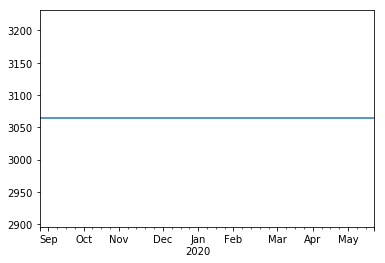

In [156]:
c.forecast(39).plot() # plot for additive trend and additive seasonality

## VAR model

In [138]:
from statsmodels.tsa.api import VAR

In [140]:
df.drop('Date',axis=1,inplace=True)

In [141]:
df

,ACTUAL,ACTUAL1
Date,,
2016-12-24,112,1819
2016-12-31,118,2239
2017-01-07,132,2150
2017-01-14,129,1840
2017-01-21,121,1697
...,...,...
2020-04-25,360,3106
2020-05-02,342,2872
2020-05-09,406,2861


In [142]:
model_var = VAR(df[['ACTUAL','ACTUAL1']]) 
for i in [1,2,3,4,5,6,7,8,9]:   # iterating for for 9 lags to find the best fit lag order
    result = model_var.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
# best fit lag order is 4

Lag Order = 1
AIC :  18.659364263136062
Lag Order = 2
AIC :  18.5547869267878
Lag Order = 3
AIC :  18.48314012261614
Lag Order = 4
AIC :  18.382393673495372
Lag Order = 5
AIC :  18.400510604696354
Lag Order = 6
AIC :  18.38790486672885
Lag Order = 7
AIC :  18.375251763027023
Lag Order = 8
AIC :  18.322720823931256
Lag Order = 9
AIC :  18.267274158899003


C:\Users\dreddy86\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)


In [143]:
result = model_var.fit(4)
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 28, Dec, 2022
Time:                     20:15:28
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    18.7079
Nobs:                     175.000    HQIC:                   18.5144
Log likelihood:          -2087.09    FPE:                9.62611e+07
AIC:                      18.3824    Det(Omega_mle):     8.70746e+07
--------------------------------------------------------------------
Results for equation ACTUAL
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const            -16.619907        16.333761           -1.018           0.309
L1.ACTUAL          1.091071         0.075277           14.494           0.000
L1.ACTUAL1        -0.005287         0.008525           -0.620          

In [144]:
lag_order = result.k_ar # storing the value of best fit lag
lag_order

4

In [145]:
forecast_input = df.values[-lag_order:] # storing the input values for forecasting in 'forecaast_input'
forecast_input

array([[ 342, 2872],
       [ 406, 2861],
       [ 396, 3248],
       [ 420, 2849]], dtype=int64)

In [152]:
nobs = 39 # forecast horizon/size
fc = result.forecast(y=forecast_input, steps=nobs) #forecasting the result
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast.head(3)

,ACTUAL_2d,ACTUAL1_2d
Date,,
2019-08-31,394.001794,3126.639656
2019-09-07,369.579873,3004.216106
2019-09-14,352.902916,3117.455211


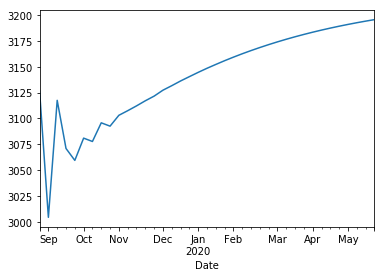

In [159]:
df_forecast['ACTUAL1_2d'].plot()

In [154]:
mean_absolute_percentage_error(df_forecast['ACTUAL1_2d'][:39],df['ACTUAL1'][140:])

0.09971285993090791

In [173]:
print('Auto Arima MAPE:',mean_absolute_percentage_error(m1.forecast(39),df['ACTUAL1'][140:]))
print('ARIMA MAPE:',mean_absolute_percentage_error(m2.forecast(39),df['ACTUAL1'][140:]))
print('Holt Winters MAPE:',mean_absolute_percentage_error(c.forecast(39),df['ACTUAL1'][140:]))
print('VAR MAPE:',mean_absolute_percentage_error(df_forecast['ACTUAL1_2d'][:39],df['ACTUAL1'][140:]))

Auto Arima MAPE: 0.10744815378039003
ARIMA MAPE: 0.10704825969553124
Holt Winters: 0.1074834807599576
VAR: 0.09971285993090791


In [160]:
def smape(actual, predicted) -> float:

  

    # Convert actual and predicted to numpy

    # array data type if not already

    if not all([isinstance(actual, np.ndarray),

                isinstance(predicted, np.ndarray)]):

        actual = np.array(actual)

        predicted = np.array(predicted)



    error = round(

        np.mean(

            np.abs(predicted - actual) /

            ((np.abs(predicted) + np.abs(actual))/2)

        )*100, 2)

  

    return error

In [174]:
print('Auto Arima SMAPE:',smape(m1.forecast(39),df['ACTUAL1'][140:]))
print('ARIMA SMAPE:',smape(m2.forecast(39),df['ACTUAL1'][140:]))
print('Holt Winters SMAPE:',smape(c.forecast(39),df['ACTUAL1'][140:]))
print('VAR SMAPE:',smape(df_forecast['ACTUAL1_2d'][:39],df['ACTUAL1'][140:]))

Auto Arima SMAPE: 9.88
ARIMA SMAPE: 9.84
Holt Winters SMAPE: 9.88
VAR SMAPE: 9.29


In [176]:
!pip install arch

     -------------------------------------- 842.5/842.5 kB 1.3 MB/s eta 0:00:00


In [13]:
from arch import arch_model

In [181]:
df.describe()

,ACTUAL,ACTUAL1
count,179.000000,179.000000
mean,278.916201,3103.061453
std,97.860016,546.942052
min,104.000000,1697.000000
25%,196.000000,2782.500000
50%,278.000000,3139.000000
75%,348.000000,3536.000000
max,505.000000,4172.000000


In [14]:
model = arch_model(residuals, p=12)

In [15]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     17,   Neg. LLF: 1088.033793157671
Iteration:      2,   Func. Count:     34,   Neg. LLF: 1006.4991545926813
Iteration:      3,   Func. Count:     51,   Neg. LLF: 1002.8957661695965
Iteration:      4,   Func. Count:     70,   Neg. LLF: 1005.6089357085243
Iteration:      5,   Func. Count:     89,   Neg. LLF: 1004.8972251745399
Iteration:      6,   Func. Count:    106,   Neg. LLF: 1004.9408697545764
Iteration:      7,   Func. Count:    123,   Neg. LLF: 1006.9124148603431
Iteration:      8,   Func. Count:    140,   Neg. LLF: 1006.4137665077612
Iteration:      9,   Func. Count:    157,   Neg. LLF: 999.1749451923224
Iteration:     10,   Func. Count:    173,   Neg. LLF: 999.0825830731799
Iteration:     11,   Func. Count:    189,   Neg. LLF: 999.0464355972092
Iteration:     12,   Func. Count:    205,   Neg. LLF: 999.0037182184101
Iteration:     13,   Func. Count:    221,   Neg. LLF: 998.9070509785686
Iteration:     14,   Func. Count:    237,   Neg. LLF: 998

C:\Users\dreddy86\AppData\Local\Continuum\anaconda3\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.065e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


In [16]:
yhat = model_fit.forecast(horizon=39,reindex=True)

In [26]:
yhat

In [23]:
yhat.mean

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.30,h.31,h.32,h.33,h.34,h.35,h.36,h.37,h.38,h.39
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


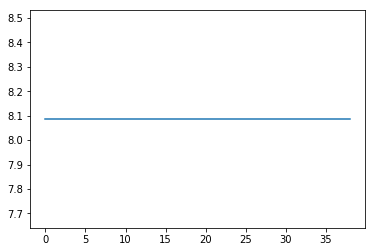

In [22]:
plt.plot(yhat.mean.values[-1, :])

In [197]:
model = arch_model(df['ACTUAL1'][:140]/10, mean='Zero', vol='ARCH', p=12,q=12)
model_fit = model.fit()

Iteration:      1,   Func. Count:     15,   Neg. LLF: 997.9174819934473
Iteration:      2,   Func. Count:     29,   Neg. LLF: 997.7135178442304
Iteration:      3,   Func. Count:     43,   Neg. LLF: 997.5855434054295
Iteration:      4,   Func. Count:     57,   Neg. LLF: 997.5058169379442
Iteration:      5,   Func. Count:     71,   Neg. LLF: 997.502473497019
Iteration:      6,   Func. Count:     85,   Neg. LLF: 997.4972199361076
Iteration:      7,   Func. Count:     99,   Neg. LLF: 997.4967257664176
Iteration:      8,   Func. Count:    113,   Neg. LLF: 997.496692444198
Iteration:      9,   Func. Count:    127,   Neg. LLF: 997.496691156772
Iteration:     10,   Func. Count:    141,   Neg. LLF: 997.4966907740813
Optimization terminated successfully    (Exit mode 0)
            Current function value: 997.4966907740813
            Iterations: 10
            Function evaluations: 141
            Gradient evaluations: 10


In [195]:
yhat = model_fit.forecast(horizon=39,reindex=True)

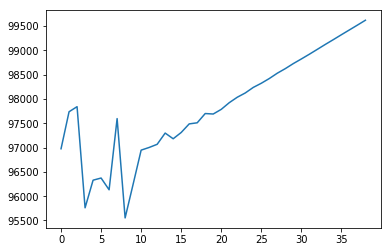

In [196]:
plt.plot(yhat.variance.values[-1, :])

In [204]:
df

,ACTUAL,ACTUAL1
Date,,
2016-12-24,112,1819
2016-12-31,118,2239
2017-01-07,132,2150
2017-01-14,129,1840
2017-01-21,121,1697
...,...,...
2020-04-25,360,3106
2020-05-02,342,2872
2020-05-09,406,2861


In [207]:
df['ACTUAL1'].shift()+df['ACTUAL1'].diff()

Date
2016-12-24       NaN
2016-12-31    2239.0
2017-01-07    2150.0
2017-01-14    1840.0
2017-01-21    1697.0
               ...  
2020-04-25    3106.0
2020-05-02    2872.0
2020-05-09    2861.0
2020-05-16    3248.0
2020-05-23    2849.0
Name: ACTUAL1, Length: 179, dtype: float64

In [253]:
residuals.describe()

,0
count,140.000000
mean,37.600044
std,327.548253
min,-880.831772
25%,-165.631660
50%,49.728620
75%,216.757457
max,1819.000000
